## Importando Bibliotecas

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

##from chefboost.training import Training
from chefboost import Chefboost as chef

In [53]:
Chefboost.fit

<function chefboost.Chefboost.fit(df, config={}, target_label='Decision', validation_df=None)>

In [15]:
df = pd.read_csv("/Users/lucas/TCC/deputados_federais_com_financiamento.csv")

## Explorações Iniciais

In [3]:
df.columns.values

array(['NR_CPF_CANDIDATO', 'SQ_CANDIDATO', 'SG_UE', 'NM_UE',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND',
       'TP_AGREMIACAO', 'SG_PARTIDO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'SG_UF_NASCIMENTO', 'NR_IDADE_DATA_POSSE', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA',
       'CD_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 'ST_REELEICAO',
       'ST_DECLARAR_BENS', 'CD_SITUACAO_CANDIDATO_PLEITO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_URNA',
       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA',
       'DS_SIT_TOT_TURNO', 'CD_SIT_TOT_TURNO',
       'FIN_COMERCIALIZACAO_DE_BENS_EVENTOS', 'FIN_DOACAO_PELA_INTERNET',
       'FIN_RECURSOS_FINANCIAMENTO_COLETIVO',
       'FIN_ORIGEM_NAO_IDENTIFICADA', 'FIN_RECURSOS_OUTROS_CANDIDATOS',
       'FIN_PARTIDO_POLITICO', 'FIN_RECURSOS_P

Text(0, 0.5, 'Doacao')

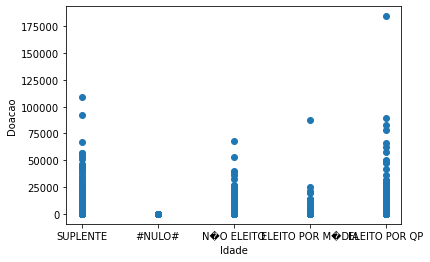

In [34]:
plt.scatter(x=df.iloc[:,31], y=df.iloc[:,35])
plt.xlabel("Idade")
plt.ylabel("Doacao")

## Limpando e alterando colunas

In [19]:
df['Decision'] = 'NaN'

In [72]:
for index, row in df.iterrows():
    if row['DS_SIT_TOT_TURNO'] == "SUPLENTE" or row['DS_SIT_TOT_TURNO'] == "N�O ELEITO" or row['DS_SIT_TOT_TURNO'] == "#NULO#" :
        df.loc[index,'Decision'] = "no"
    else: df.loc[index,'Decision'] = "yes"
        

In [73]:
df['Decision'].value_counts()


no     8075
yes     513
Name: Decision, dtype: int64

In [74]:
## fatorando

df['SG_PARTIDO_F'] = pd.factorize(df['SG_PARTIDO'])[0]
df['ST_REELEICAO_F'] = pd.factorize(df['ST_REELEICAO'])[0]
df['ST_DECLARAR_BENS_F'] = pd.factorize(df['ST_DECLARAR_BENS'])[0]


In [75]:
## Utilizando todo o sample

sample = df[["CD_SITUACAO_CANDIDATURA","SQ_COLIGACAO","NR_IDADE_DATA_POSSE","CD_GENERO","CD_ESTADO_CIVIL",
             "CD_COR_RACA","CD_OCUPACAO","VR_DESPESA_MAX_CAMPANHA","FIN_COMERCIALIZACAO_DE_BENS_EVENTOS",
             "FIN_DOACAO_PELA_INTERNET","FIN_RECURSOS_FINANCIAMENTO_COLETIVO","FIN_ORIGEM_NAO_IDENTIFICADA",
             "FIN_RECURSOS_OUTROS_CANDIDATOS","FIN_PARTIDO_POLITICO","FIN_RECURSOS_PESSOAS_FISICAS",
             "RECURSOS_PROPRIOS","FIN_APLICACOES_FINANCEIRAS","SG_PARTIDO_F","ST_REELEICAO_F","ST_DECLARAR_BENS_F","Decision"]]

In [113]:
sample.dropna(inplace=True)

# Realizando a regressao

In [8]:
x = sample.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
y = sample.eleito
y=y.astype('int')

In [9]:
logreg = LogisticRegression(max_iter=200)

In [11]:
logreg.fit(x, y)

LogisticRegression(max_iter=200)

In [12]:
print(logreg.coef_)   #Resultados do modelo

[[-3.23491815e-21 -1.68964337e-11 -1.57934063e-20 -1.07826980e-21
  -1.07442040e-21 -8.89779774e-22 -2.20572523e-19 -8.53856706e-16
   1.75061127e-20  1.28404772e-20  1.34797679e-18  2.01274367e-20
   7.16788534e-18  3.09544118e-16  5.05852132e-17  3.06585844e-17
   2.43708989e-20 -4.25339134e-21  1.84843882e-22 -4.41928079e-23]]


In [14]:
yhat = logreg.predict_proba(x)  #Prediznedo as probabilidade

In [15]:
yhat = yhat[:, 1] # manter somente para a classe positiva

# Árvore de decisão 

## ID3

In [89]:
config = {"algorithm":'ID3'}

In [90]:
gains = Training.findGains(sample, config)

In [91]:
gains

{'gains': {'CD_SITUACAO_CANDIDATURA': 0.010320378741841829,
  'SQ_COLIGACAO': 0.0010161612304402101,
  'NR_IDADE_DATA_POSSE': 0.00023985678640863362,
  'CD_GENERO': 0.007060393861794453,
  'CD_ESTADO_CIVIL': 0.002138391096516812,
  'CD_COR_RACA': 0.006527751315650865,
  'CD_OCUPACAO': 0.01581125428126838,
  'VR_DESPESA_MAX_CAMPANHA': 0.0,
  'FIN_COMERCIALIZACAO_DE_BENS_EVENTOS': 0.0009473543061054857,
  'FIN_DOACAO_PELA_INTERNET': 0.00035663217682468376,
  'FIN_RECURSOS_FINANCIAMENTO_COLETIVO': 0.013724343564876937,
  'FIN_ORIGEM_NAO_IDENTIFICADA': 0.002319982931228955,
  'FIN_RECURSOS_OUTROS_CANDIDATOS': 0.022209142905957102,
  'FIN_PARTIDO_POLITICO': 0.11450135606888748,
  'FIN_RECURSOS_PESSOAS_FISICAS': 0.08199690197275739,
  'RECURSOS_PROPRIOS': 0.0285547332951345,
  'FIN_APLICACOES_FINANCEIRAS': 0.008016795315486894,
  'SG_PARTIDO_F': 0.0013387429113288158,
  'ST_REELEICAO_F': 0.07947651666873348,
  'ST_DECLARAR_BENS_F': 0.02841456629970315},
 'entropy': 0.326390133335396}

## C4.5  - TCC

C4.5 is one of the most common decision tree algorithm. It offers some improvements over ID3 such as handling numerical features. It uses entropy and gain ratio to find the decision points in the decision tree.

Herein, chefboost is a python based gradient boosting, random forest and adaboost enabled decision tree framework. In this video, we are going to see how to apply C4.5 for a classification problem in Python. You need to write just a few lines of code.

In [92]:
config = {"algorithm":'C4.5'}

In [93]:
model = chef.fit(sample, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  176.49157571792603  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  96.89101071262226 % on  8588  instances
Labels:  ['no' 'yes']
Confusion matrix:  [[7996, 188], [79, 325]]
Precision:  97.7028 %, Recall:  99.0217 %, F1:  98.3578 %


In [94]:
sample.iloc[0]

CD_SITUACAO_CANDIDATURA                                  >3
SQ_COLIGACAO                            >164013790461.49243
NR_IDADE_DATA_POSSE                      >25.07500333789578
CD_GENERO                                               <=2
CD_ESTADO_CIVIL                                         <=1
CD_COR_RACA                                             <=1
CD_OCUPACAO                             >431.78365160689333
VR_DESPESA_MAX_CAMPANHA                           <=2500000
FIN_COMERCIALIZACAO_DE_BENS_EVENTOS                 <=990.0
FIN_DOACAO_PELA_INTERNET                              <=0.0
FIN_RECURSOS_FINANCIAMENTO_COLETIVO      <=610.870221238938
FIN_ORIGEM_NAO_IDENTIFICADA                           <=0.0
FIN_RECURSOS_OUTROS_CANDIDATOS         <=3851.1179389846297
FIN_PARTIDO_POLITICO                   <=460704.38577628654
FIN_RECURSOS_PESSOAS_FISICAS            <=19576.71843502562
RECURSOS_PROPRIOS                      <=15338.179049836983
FIN_APLICACOES_FINANCEIRAS              

In [95]:
prediction = chef.predict(model,sample.iloc[0])

In [96]:
prediction

'no'

In [97]:
for index, instance in sample.iterrows():
    prediction = chef.predict(model, instance)
    actual = instance['Decision']
    
    print(actual,"-",prediction)

no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - yes
yes - yes
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
yes - no
no - no
no - no
no - no
no - no
no - no
yes - yes
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
yes - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
yes - yes
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no

In [98]:
for index, instance in sample.iterrows():
    prediction = chef.predict(model, instance)
    actual = instance['Decision']
    
    if actual == prediction:
        classified = True
    else:
        classified = False
        print("*", end = '')
    
    
    print(actual,"-",prediction)

no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
*no - yes
yes - yes
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
*yes - no
no - no
no - no
no - no
no - no
no - no
yes - yes
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
*yes - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
yes - yes
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no -

## CHAID

CHAID (chi-square automatic interaction detection) is a conventional decision tree algorithm. It uses chi-square testing value to find the decision splits. This metric is used to find the significance in statistics as well.

Similar to ID3 and C4.5, it can be applied for classification problems. In other words, you should feed a data set including categorical target value.


In [99]:
config = {"algorithm":'CHAID'}

In [100]:
tree = chef.fit(sample, config)

[INFO]:  2 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  228.59102582931519  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  96.89101071262226 % on  8588  instances
Labels:  ['no' 'yes']
Confusion matrix:  [[7996, 188], [79, 325]]
Precision:  97.7028 %, Recall:  99.0217 %, F1:  98.3578 %


In [101]:
test_instance = sample.iloc[0]

In [102]:
chef.predict(tree,test_instance)

'no'

## CART - TCC

CART (Classification and Regression Trees) is one of the most common decision tree algorithm. It can handle numerical features. It uses gini index to find the decision points in the decision tree.

In [104]:
config = {"algorithm":'CART'}

In [105]:
model = chef.fit(sample.copy(),config)

[INFO]:  2 CPU cores will be allocated in parallel running
CART  tree is going to be built...
-------------------------
finished in  198.9179368019104  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  96.89101071262226 % on  8588  instances
Labels:  ['no' 'yes']
Confusion matrix:  [[7996, 188], [79, 325]]
Precision:  97.7028 %, Recall:  99.0217 %, F1:  98.3578 %


In [106]:
for index, instance in sample.iterrows():
    prediction = chef.predict(model, instance)
    actual = instance['Decision']
    
    print(actual,"-",prediction)

no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - yes
yes - yes
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
yes - no
no - no
no - no
no - no
no - no
no - no
yes - yes
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
yes - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
yes - yes
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no
no - no

## Regression trees

Regression trees are one of the most common decision tree algorithm. Adaboost and gradient boosting methods are based on decision trees. Even gradient boosting will be applied on a classification problem, it must be transformed to regression first.

In [107]:
config = {"algorithm":'Regression'}

In [118]:
sample2

,CD_SITUACAO_CANDIDATURA,SQ_COLIGACAO,NR_IDADE_DATA_POSSE,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,CD_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,FIN_COMERCIALIZACAO_DE_BENS_EVENTOS,FIN_DOACAO_PELA_INTERNET,...,FIN_ORIGEM_NAO_IDENTIFICADA,FIN_RECURSOS_OUTROS_CANDIDATOS,FIN_PARTIDO_POLITICO,FIN_RECURSOS_PESSOAS_FISICAS,RECURSOS_PROPRIOS,FIN_APLICACOES_FINANCEIRAS,SG_PARTIDO_F,ST_REELEICAO_F,ST_DECLARAR_BENS_F,Decision
0,12,240000050741,44,2,1,1,999,2500000,0.0,0.0,...,0.0,0.0,449959.05,10000.00,0.0,0.0,0,0,0,0
1,3,160000050570,37,4,9,1,999,2500000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,1,0,0,0
2,12,130000050443,41,4,3,3,254,2500000,0.0,0.0,...,0.0,0.0,1263.00,0.00,0.0,0.0,2,0,1,0
3,12,240000050054,38,2,3,1,265,2500000,0.0,0.0,...,0.0,1950.0,3342.46,600.00,620.0,0.0,3,0,1,0
4,12,200000050348,39,4,9,1,278,2500000,0.0,0.0,...,0.0,0.0,118687.50,0.00,0.0,0.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,12,50000050122,39,2,1,3,257,2500000,0.0,0.0,...,0.0,0.0,2268.11,0.00,0.0,0.0,7,0,1,0
8584,12,60000050323,38,2,1,1,133,2500000,0.0,0.0,...,0.0,0.0,215000.00,428717.55,90000.0,0.0,22,0,1,1
8585,3,190000050414,53,4,9,1,254,2500000,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,9,0,1,0
8586,12,60000050534,35,4,3,3,129,2500000,0.0,0.0,...,0.0,0.0,89832.78,800.00,0.0,0.0,3,0,1,0


In [117]:
model = chef.fit(sample2.copy(),config)

[INFO]:  2 CPU cores will be allocated in parallel running


ValueError: Regression trees cannot be applied for nominal target values! You can either change the algorithm or data set.